<a href="https://colab.research.google.com/github/musaoc/DAT3/blob/master/analyzing_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Libraries



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('Cleansed.xlsx')

In [6]:
df.head()

,Link,Developer,Location,Type,Shape,Price,Map,Name,page-N1,page-n2
0,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,119 M²,"1,828,250 EGP","['(29.97872859347, 31.784648895264)']",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...
1,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,135 M²,"2,218,750 EGP","['(29.97872859347, 31.784648895264)']",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...
2,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,156 M²,"2,544,000 EGP","['(29.97872859347, 31.784648895264)']",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...
3,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,168 M²,"2,520,000 EGP","['(29.97872859347, 31.784648895264)']",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...
4,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,170 M²,"2,497,500 EGP","['(29.97872859347, 31.784648895264)']",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...


In [7]:
#df['Page'].value_counts()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Link       2188 non-null   object
 1   Developer  2180 non-null   object
 2   Location   2188 non-null   object
 3   Type       2188 non-null   object
 4   Shape      2188 non-null   object
 5   Price      2188 non-null   object
 6   Map        2188 non-null   object
 7   Name       2188 non-null   object
 8   page-N1    2188 non-null   object
 9   page-n2    2188 non-null   object
dtypes: object(10)
memory usage: 171.1+ KB


In [9]:
r1,c1 = df.shape
print('The training data has {} rows and {} columns'.format(r1,c1))

The training data has 2188 rows and 10 columns


In [10]:
df['Link'].nunique()

163

In [11]:
df.describe()

,Link,Developer,Location,Type,Shape,Price,Map,Name,page-N1,page-n2
count,2188,2180,2188,2188,2188,2188,2188,2188,2188,2188
unique,163,113,44,21,372,1844,156,130,17,162
top,https://aqarmap.com.eg/en/listing/998454-proje...,Akam Developments,New Administrative Capital,Apartments,160 M²,"1,396,940 EGP","['(30.081319450207, 31.67952269112)']",Nan,Call for price,Sarai Compound New Cairo From Madinet Nasr
freq,121,136,594,1346,48,11,121,384,1873,121


In [12]:
df.loc[df['Map'].mode().index]

,Link,Developer,Location,Type,Shape,Price,Map,Name,page-N1,page-n2
0,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,119 M²,"1,828,250 EGP","['(29.97872859347, 31.784648895264)']",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...


# Feature Engineering

In [13]:
def shapex(x):
    x=x[:-3]
    return int(x)

def price(x):
    x=x[:-4].replace(',','')
    return int(x)


In [16]:
def mapx(x):
    
    try:
        latx=x[1:-1].split(',')[0][2:]
        latx = float(latx)
    except:
        latx = np.NaN
    return latx
def mapy(x):
    try:
        longx=x[1:-1].split(',')[1][:-2]
        longx = float(longx)
    except:
        longx = np.NaN
    return longx
def mapz(x):
    try:
        latx=x[1:-1].split(',')[0][2:]
        latx = float(latx)
        longx=x[1:-1].split(',')[1][:-2]
        longx = float(longx)
    except:
        latx = np.NaN
        longx = np.NaN
    return latx,longx


In [17]:
df['Lat'] = df['Map'].apply(mapx)
df['Long'] = df['Map'].apply(mapy)
df['Map'] = df['Map'].apply(mapz)

In [18]:
df['Shape (M²)'] = df['Shape'].apply(shapex)
df['Price (EGP)'] = df['Price'].apply(price)

In [19]:
df.loc[df['Type']=='Apartment','Type']='Apartments'
df.loc[df['Developer']=='Palm hills development','Developer']='Palm Hills Development'
#df.loc[df['Type']=='Twin Villa','Type']='Villas'

# Analysis Process

In [20]:
df.describe()

,Lat,Long,Shape (M²),Price (EGP)
count,2096.000000,2096.000000,2188.000000,2.188000e+03
mean,30.016531,31.539186,204.722578,5.611597e+06
std,0.053271,0.223168,111.465728,6.342712e+06
min,29.943203,30.886441,30.000000,6.239200e+05
25%,29.972000,31.460824,144.000000,2.430438e+06
50%,30.007263,31.597848,179.000000,3.712297e+06
75%,30.057479,31.714308,239.000000,5.835000e+06
max,30.225400,31.788313,908.000000,4.800000e+07


908 is outlier.

## Categorical Cols Counts

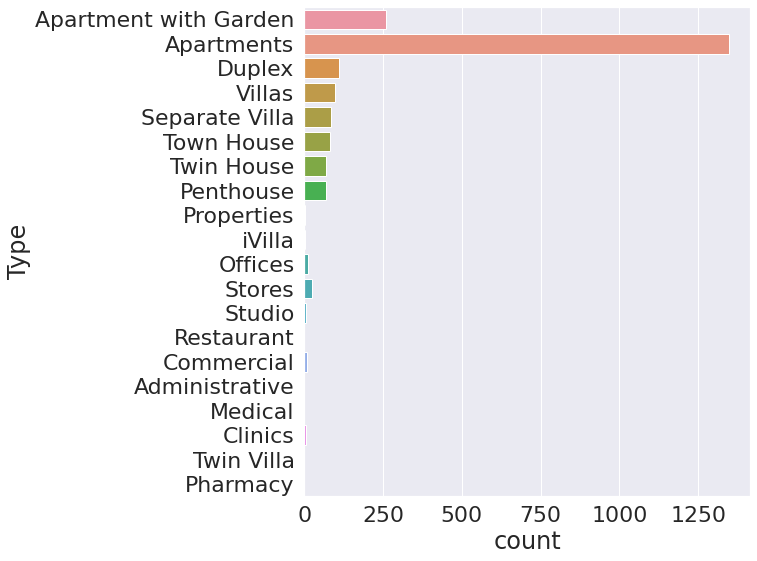

In [21]:
plt.figure(figsize=(8,9))
sns.countplot(y=df['Type'])
plt.yticks(rotation=0);

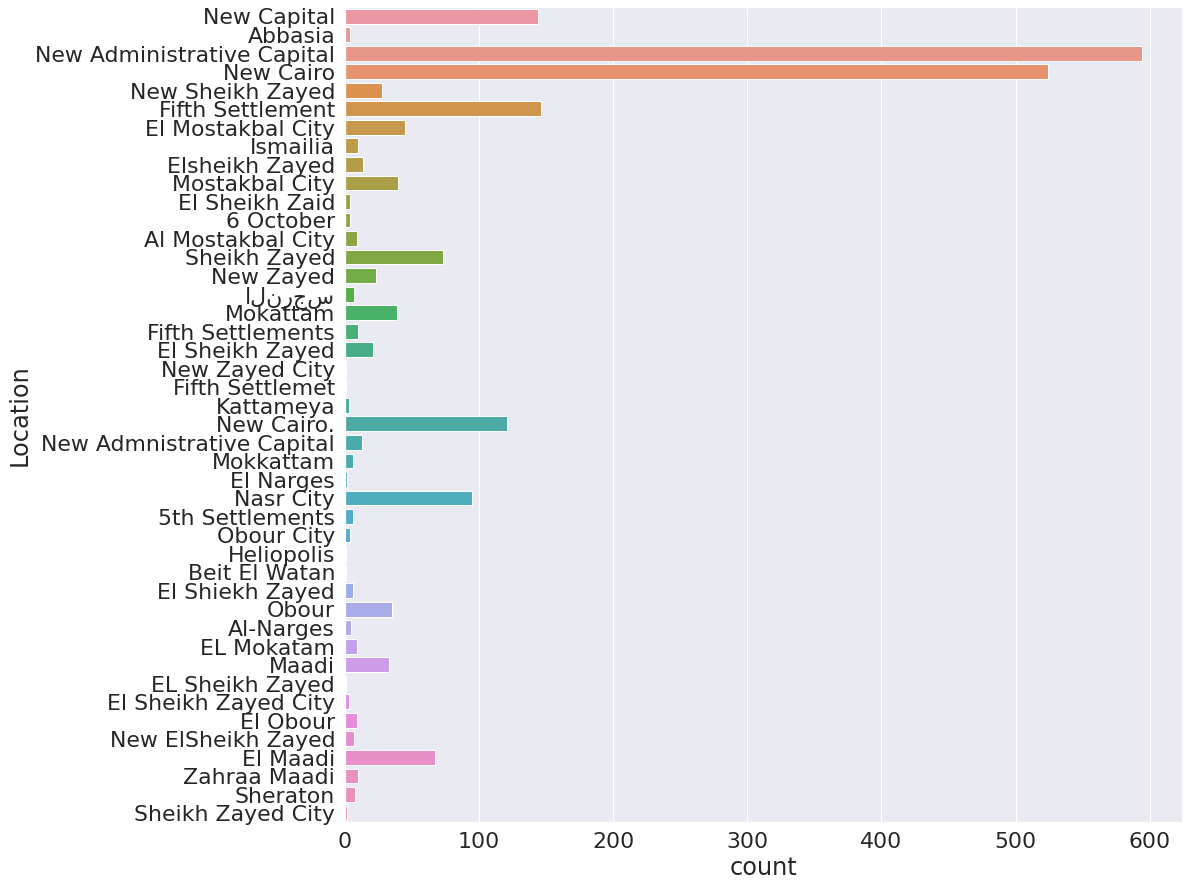

In [22]:
plt.figure(figsize=(15,15))
sns.countplot(y=df['Location'])
plt.yticks(rotation=0);

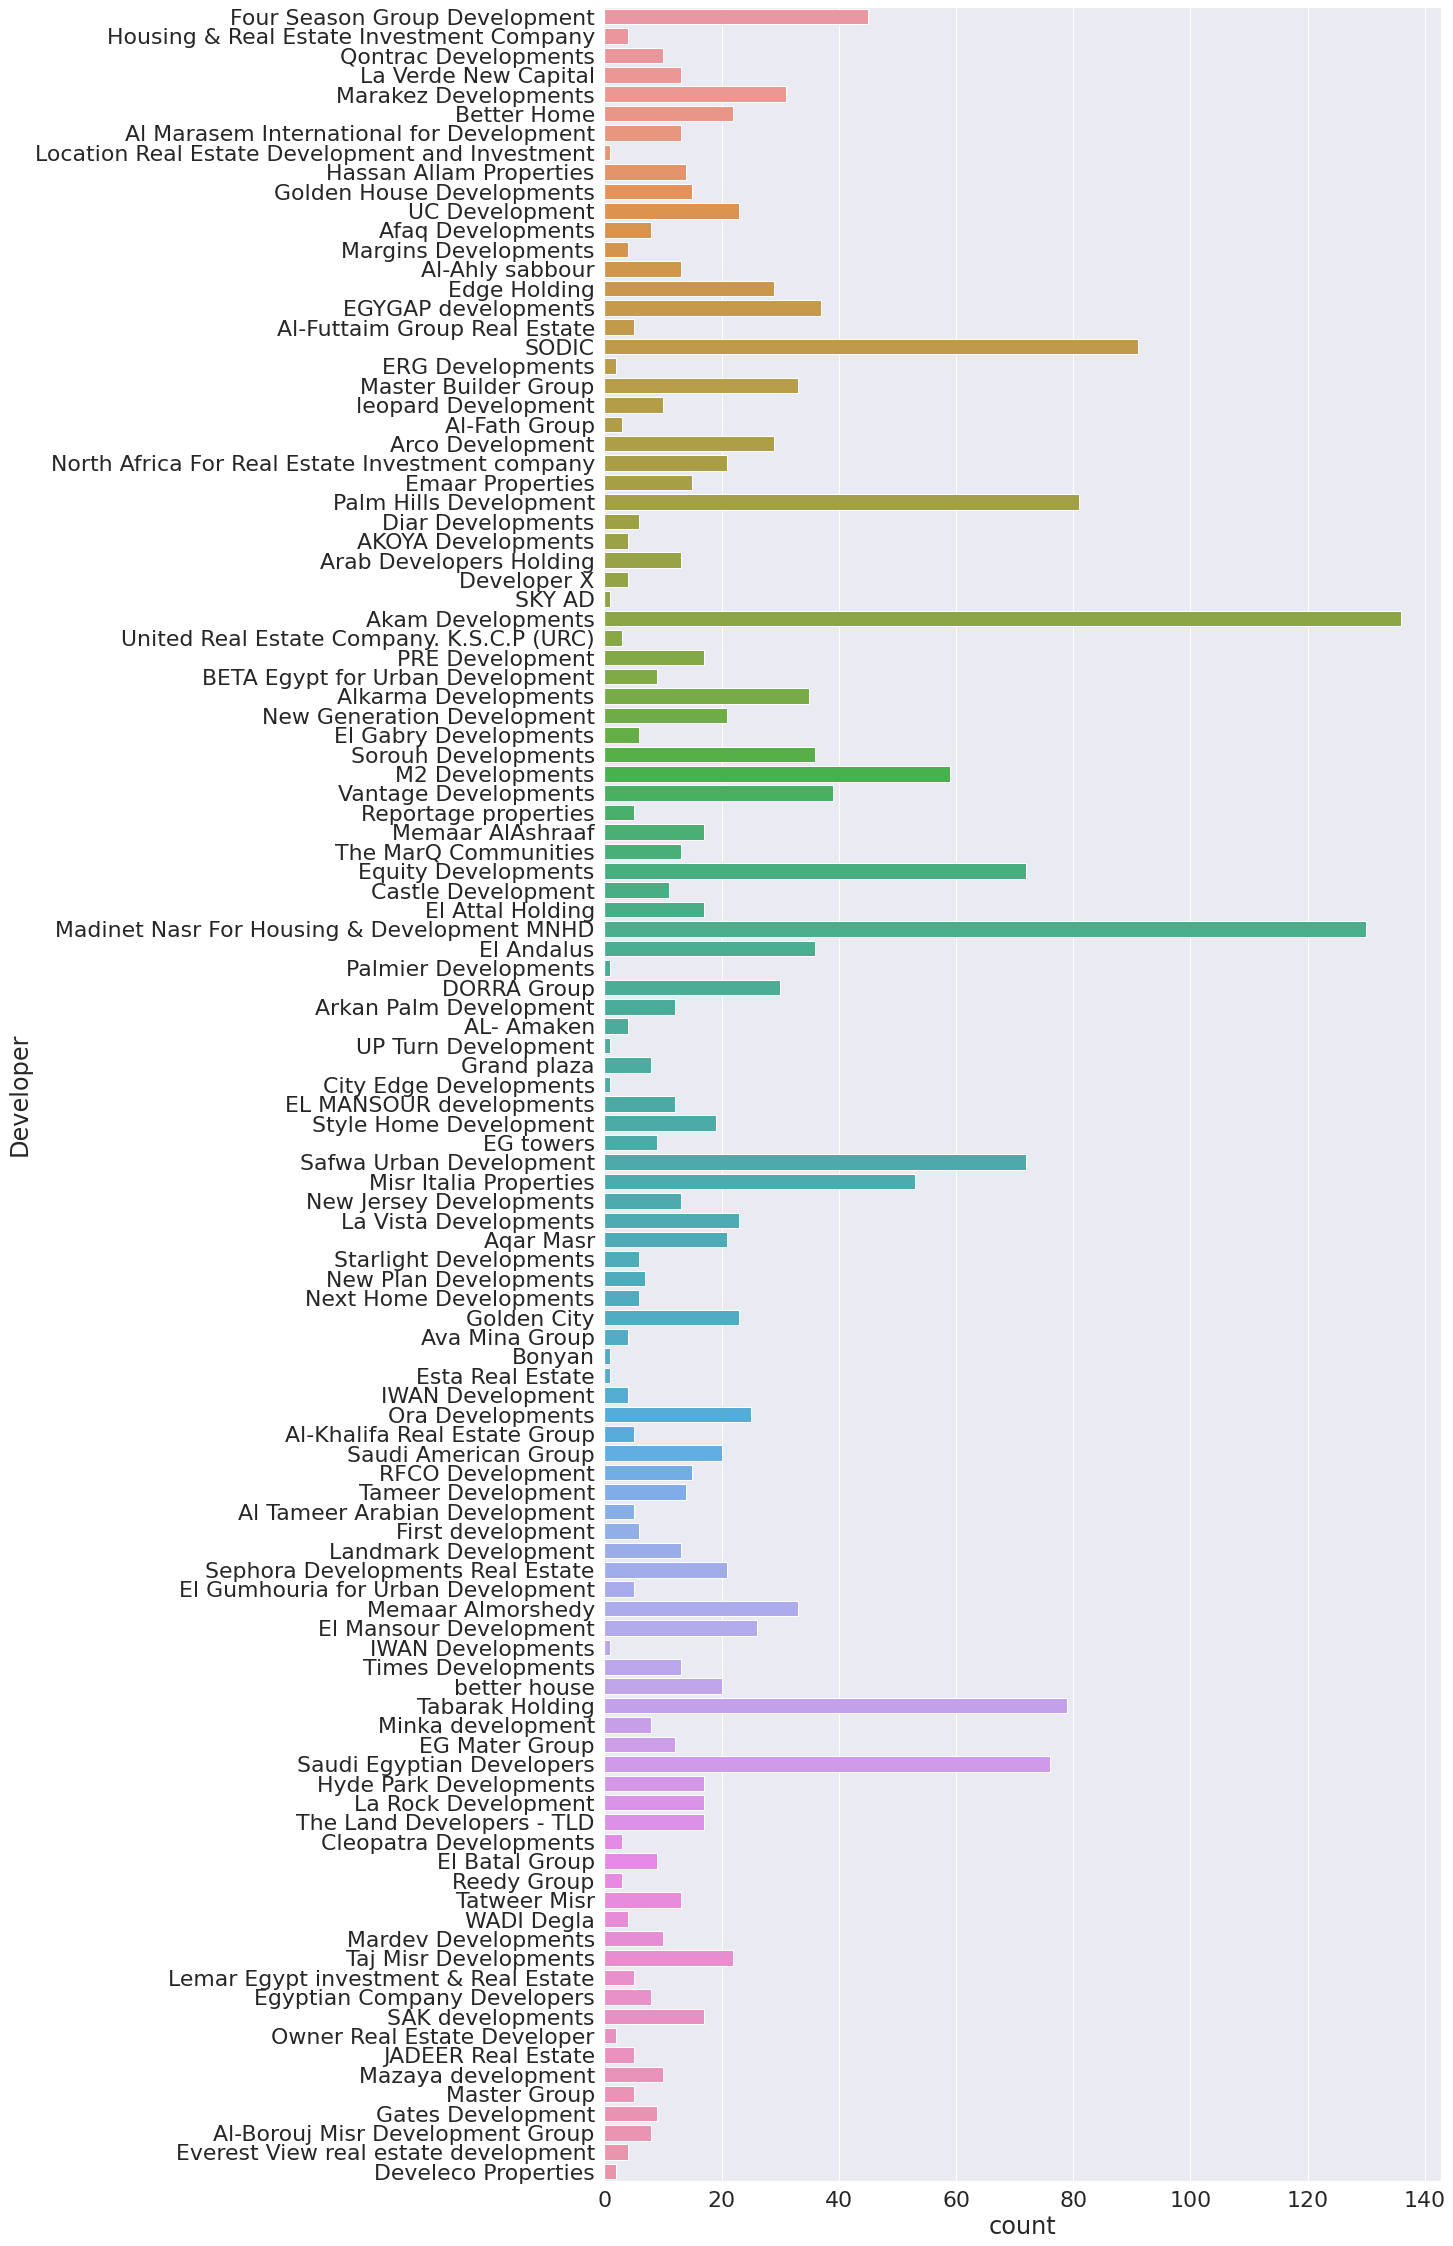

In [23]:
plt.figure(figsize=(15,40))
sns.countplot(y=df['Developer'])
plt.yticks(rotation=0);
# not a good measure.

### Palm hills are rich as .
Tabarak is cheaper.

## Price column

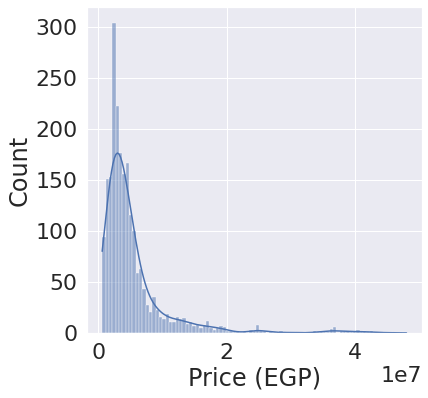

In [24]:
plt.figure(figsize=(6,6))
sns.histplot(df['Price (EGP)'],kde=True);

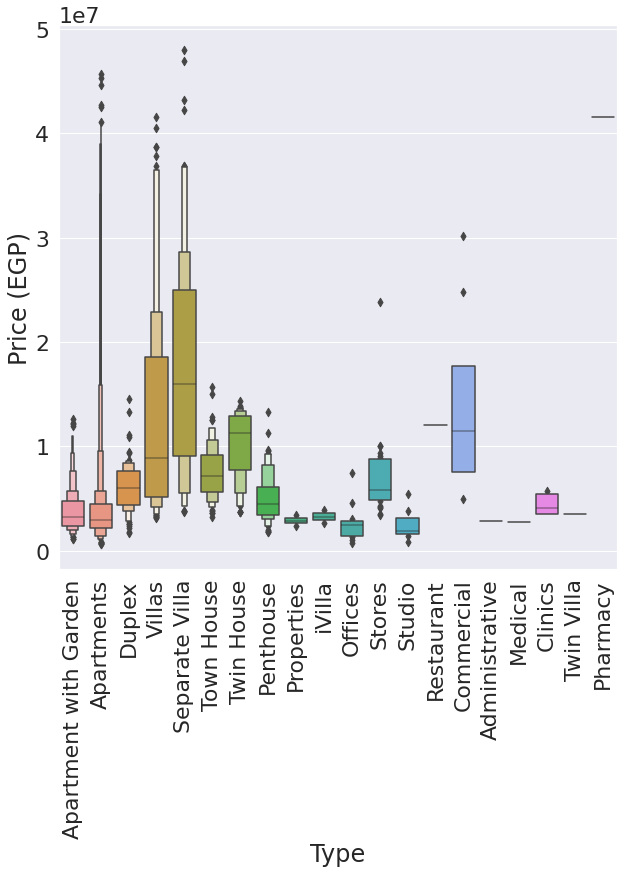

In [25]:
plt.figure(figsize=(10,10))
sns.boxenplot(x=df['Type'],y=df['Price (EGP)'])
plt.xticks(rotation=90);

appartments and villas need to clear.

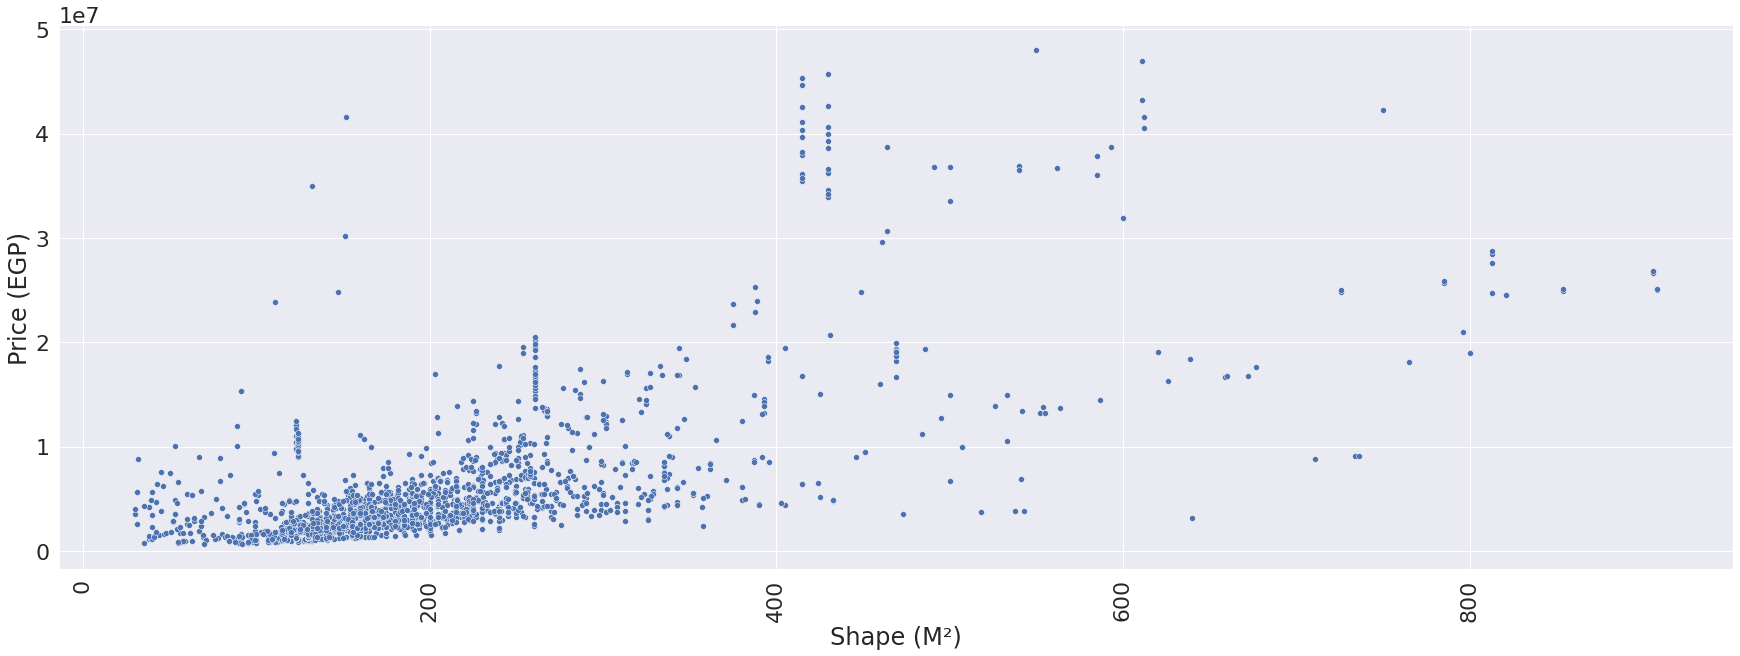

In [26]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=df['Shape (M²)'],y=df['Price (EGP)'])
plt.xticks(rotation=90);

plt.figure(figsize=(34,10))
sns.scatterplot(x=df['Shape'],y=df['Price (EGP)'],hue=df['Developer'])
plt.xticks(rotation=45);

The last part is very sus,overall with the increase of size, rate in increasing , but the greatest shape has low price at the end.

In [27]:
df['Price (EGP)'].quantile(.98)

29756739.99999986

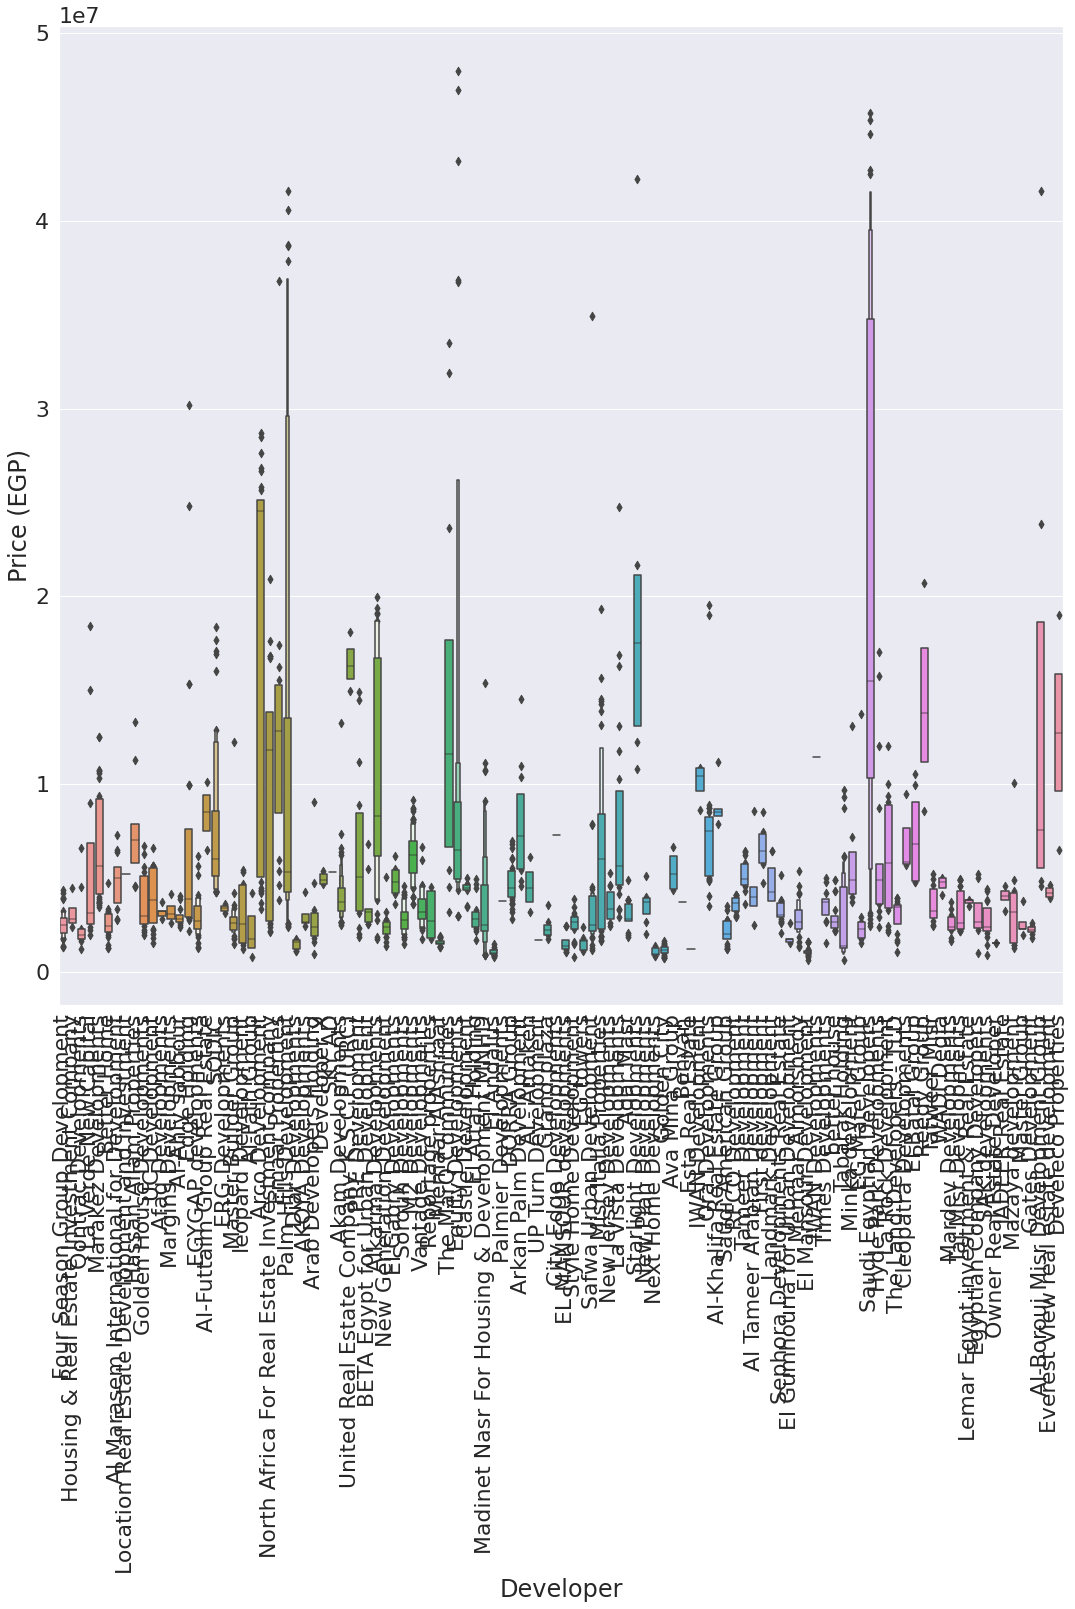

In [28]:
plt.figure(figsize=(18,18))
sns.boxenplot(x=df['Developer'],y=df['Price (EGP)'])
plt.xticks(rotation=90);

- World map
    
    # Making a map using the folium module
    
    import folium
    phone_map = folium.Map()
    
    # Top three smart phone companies by market share in 2016
    
    companies = [
    {'loc': [37.4970,  127.0266], 'label': 'Samsung: 20.5%'},
    {'loc': [37.3318, -122.0311], 'label': 'Apple: 14.4%'},
    {'loc': [22.5431,  114.0579], 'label': 'Huawei: 8.9%'}]
    
    # Adding markers to the map
    
    for company in companies:
    marker = folium.Marker(location=company['loc'], popup=company['label'])
    marker.add_to(phone_map)
    
    # The last object in the cell always gets shown in the notebook
    
    phone_map

In [ ]:
import folium 
phone_map = folium.Map()


In [ ]:
df

In [46]:
'''for company in range(len(df['Name'])):
  marker = folium.Marker( location=df[['Lat','Long']]) 
  marker.add_to(phone_map)'''

"for company in range(len(df['Name'])):\n  marker = folium.Marker( location=df[['Lat','Long']]) \n  marker.add_to(phone_map)"

In [ ]:
phone_map

In [29]:
import plotly

In [30]:
df.head()

,Link,Developer,Location,Type,Shape,Price,Map,Name,page-N1,page-n2,Lat,Long,Shape (M²),Price (EGP)
0,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,119 M²,"1,828,250 EGP","(29.97872859347, 31.784648895264)",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...,29.978729,31.784649,119,1828250
1,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,135 M²,"2,218,750 EGP","(29.97872859347, 31.784648895264)",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...,29.978729,31.784649,135,2218750
2,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,156 M²,"2,544,000 EGP","(29.97872859347, 31.784648895264)",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...,29.978729,31.784649,156,2544000
3,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,168 M²,"2,520,000 EGP","(29.97872859347, 31.784648895264)",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...,29.978729,31.784649,168,2520000
4,https://aqarmap.com.eg/en/listing/2985962-proj...,Four Season Group Development,New Capital,Apartment with Garden,170 M²,"2,497,500 EGP","(29.97872859347, 31.784648895264)",Floria Compound,Call for price,Floria Compound New Capital From Four Seasons ...,29.978729,31.784649,170,2497500


In [34]:
import plotly.express as px
import plotly.graph_objects as go
#df = px.data.gapminder().query("year==2007")
fig = go.Figure()
for i in range(len(df['Name'])):

    fig.add_trace(go.Scattergeo(
            locationmode = 'ISO-3',
            lon = df['Lat'],
            lat = df['Long'],
            text = df['Name'],
            marker = dict(
                size = df['Shape (M²)'],
                line_color='rgb(40,40,40)',
                line_width=0.5
            )))
fig.update_layout(
        title_text = 'None but me',
        showlegend = True,
        geo = dict(
            scope = 'asia',
            landcolor = 'rgb(217, 217, 217)',
        )
    )



In [47]:
display(fig.show())

In [75]:
df['Map'].sample(5).values

array([(29.975981773248, 31.555157803232),
       (29.972947908379, 31.788312792778),
       (30.061839043126, 31.597848012825),
       (29.992330722487, 31.504921058768),
       (29.960753937449, 31.704074047739)], dtype=object)

In [82]:
df_pure = df[(~df['Lat'].isnull())]
df_pure= df_pure.sample(100)

In [84]:
# Create a map
#Stamen Toner
#'cartodbpositron'
m_2 = folium.Map(location=[29.97872859347, 31.784648895264], tiles='Stamen Toner', zoom_start=13)

# Add points to the map
for idx, row in df_pure.iterrows():
  folium.Marker([row['Lat'], row['Long']], popup=row['Name']).add_to(m_2)

# Display the map
m_2
